04:22:23 - cmdstanpy - INFO - Chain [1] start processing
04:22:23 - cmdstanpy - INFO - Chain [1] done processing


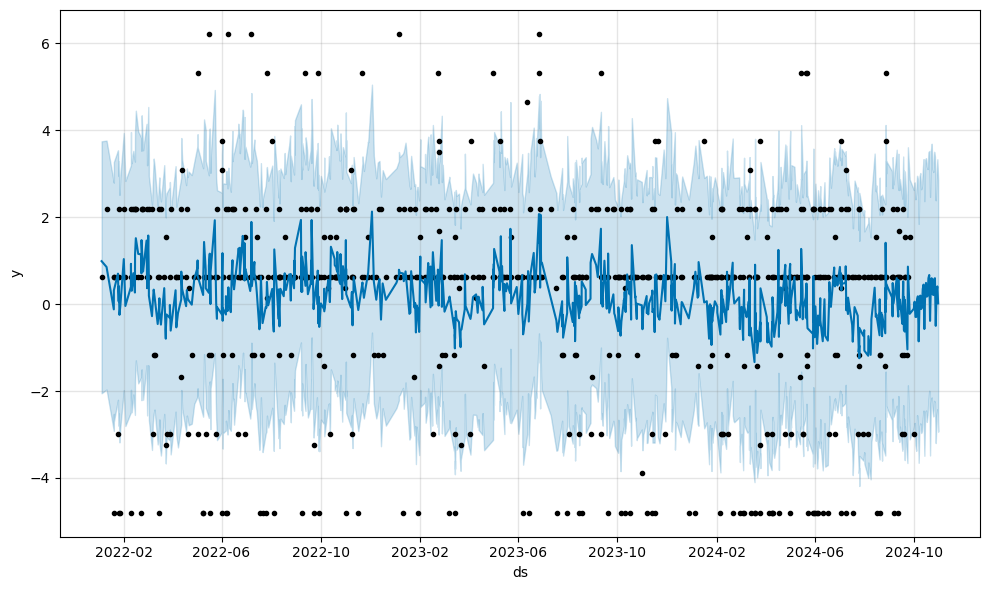

In [68]:
from prophet import Prophet
import pandas as pd

df = pd.read_pickle('../final_draft/df.pkl')

df['ds'] = pd.to_datetime(df['DATETIME_DTM'], format='%Y-%m-%d')
df.rename({'ovr_danger': 'y'}, axis=1, inplace=True)
#df = df[['ds', 'y']][::5]
df = df[df['ds'] >= '2022-01-01']

m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=30)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)

<Figure size 1200x600 with 0 Axes>

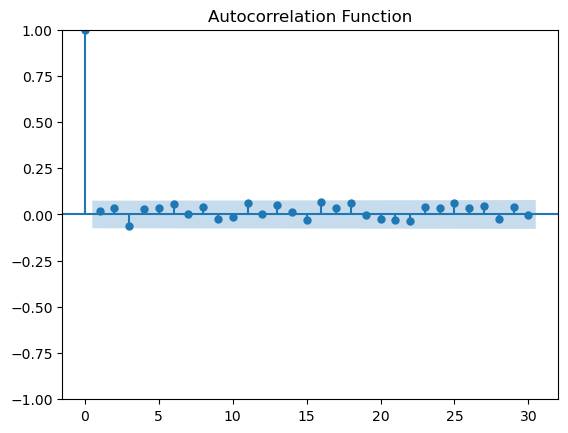

In [69]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
plot_acf(df['y'], lags=30)
plt.title('Autocorrelation Function')
plt.show()

Duplicate dates: DatetimeIndex(['2024-06-10 09:30:00', '2024-08-26 12:15:00',
               '2022-11-08 14:30:00', '2024-02-13 11:30:00',
               '2022-06-30 10:30:00', '2024-05-21 09:30:00'],
              dtype='datetime64[ns]', name='ds', freq=None)


/var/folders/1h/mw4kschx1jjdmd14bjl9nv4r0000gn/T/ipykernel_18042/1370693954.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['y'] = df['y'].fillna(method='ffill')  # Replace 'y' with your actual value column


<Figure size 1200x600 with 0 Axes>

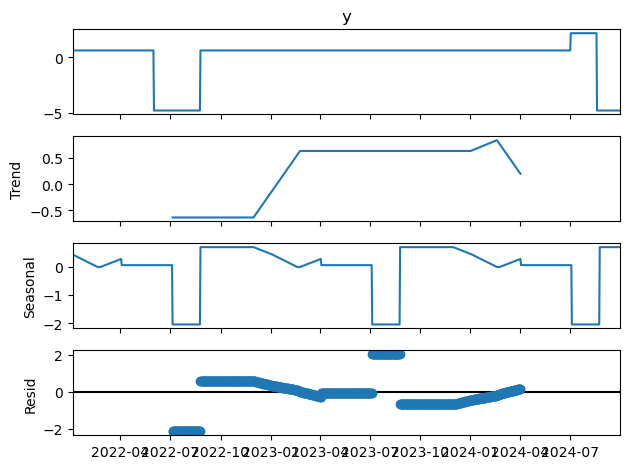

In [70]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assume df is already created and has the 'ds' column

# Ensure 'ds' is the index
df.set_index('ds', inplace=True)

# Check for duplicate index values
duplicate_dates = df.index[df.index.duplicated()]
if not duplicate_dates.empty:
    print("Duplicate dates:", duplicate_dates)
    # Option 1: Remove duplicates
    df = df[~df.index.duplicated(keep='first')]
    # Option 2: Aggregate duplicates (e.g., mean)
    # df = df.groupby(df.index).mean()

# Set frequency
df = df.asfreq('D')  # Set frequency to daily

# Fill missing values (if any)
df['y'] = df['y'].fillna(method='ffill')  # Replace 'y' with your actual value column

# Decompose the time series
plt.figure(figsize=(12, 6))
decomposition = seasonal_decompose(df['y'], model='additive', period=365)  # Set period based on data frequency
decomposition.plot()
plt.show()

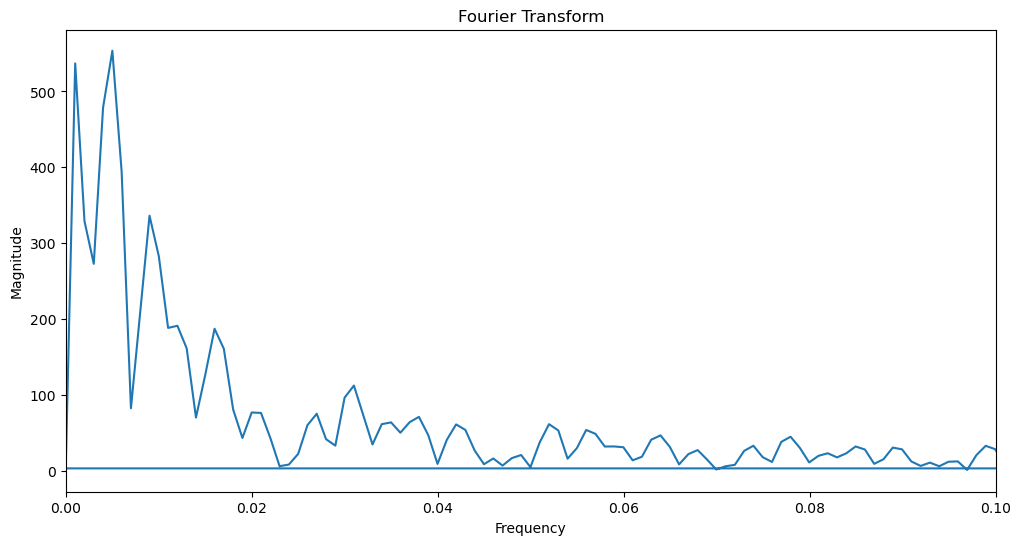

In [71]:
import numpy as np

# Take the Fourier Transform of the data
fft_values = np.fft.fft(df['y'])
fft_freq = np.fft.fftfreq(len(fft_values))

# Plot the magnitude of the FFT
plt.figure(figsize=(12, 6))
plt.plot(fft_freq, np.abs(fft_values))
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.xlim(0, 0.1)  # Adjust as needed
plt.show()